In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import keras
import optuna

In [2]:
custom_palette = ["gray", "green", "antiquewhite"]
sns.set_palette('Set2')
sns.set_style("darkgrid")

In [3]:
url_gray = "https://raw.githubusercontent.com/phule1812/surface_classification/refs/heads/main/dataset/gray_surface.csv"
url_green = "https://raw.githubusercontent.com/phule1812/surface_classification/refs/heads/main/dataset/green_surface.csv"
url_table = "https://raw.githubusercontent.com/phule1812/surface_classification/refs/heads/main/dataset/table_surface.csv"

In [4]:
df_gray = pd.read_csv(url_gray, sep = ";").drop(columns = ['Unnamed: 43'])
df_green = pd.read_csv(url_green, sep = ';').drop(columns = ['Unnamed: 43'])
df_table = pd.read_csv(url_table, sep = ';').drop(columns = ['Unnamed: 43'])

df_gray.columns = df_gray.iloc[1]
df_green.columns = df_green.iloc[1]
df_table.columns = df_table.iloc[1]

df_gray = df_gray.iloc[2:]
df_green = df_green.iloc[2:]
df_table = df_table.iloc[2:]

In [5]:
df_gray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21558 entries, 2 to 21559
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   movedir    21558 non-null  object
 1   xsetspeed  21558 non-null  object
 2   ysetspeed  21558 non-null  object
 3   setvel     21558 non-null  object
 4   m1setvel   21558 non-null  object
 5   m2setvel   21558 non-null  object
 6   m3setvel   21558 non-null  object
 7   m1pos      21558 non-null  object
 8   m2pos      21558 non-null  object
 9   m3pos      21558 non-null  object
 10  m1vel      21558 non-null  object
 11  m2vel      21558 non-null  object
 12  m3vel      21558 non-null  object
 13  m1cur      21558 non-null  object
 14  m2cur      21558 non-null  object
 15  m3cur      21558 non-null  object
 16  xcur       21558 non-null  object
 17  ycur       21558 non-null  object
 18  rotcur     21558 non-null  object
 19  xpos       21558 non-null  object
 20  ypos       21558 non-null  o

In [6]:
def count_nan(df):
    for column in df.columns:
        numbers_nan_column = df[column].isna().sum()
        if numbers_nan_column > 0:
            print(f'Number of NaN in column {column}: {numbers_nan_column}')
            print(f'Ratio  of Nan in columns {column}: {round(numbers_nan_column/df.shape[0]*100, 2)}%')

In [7]:
count_nan(df_gray)

Number of NaN in column m1tor: 1921
Ratio  of Nan in columns m1tor: 8.91%
Number of NaN in column m2tor: 2214
Ratio  of Nan in columns m2tor: 10.27%
Number of NaN in column m3tor: 1802
Ratio  of Nan in columns m3tor: 8.36%


In [8]:
count_nan(df_green)

Number of NaN in column m1tor: 2332
Ratio  of Nan in columns m1tor: 9.17%
Number of NaN in column m2tor: 2036
Ratio  of Nan in columns m2tor: 8.0%
Number of NaN in column m3tor: 2394
Ratio  of Nan in columns m3tor: 9.41%


In [9]:
count_nan(df_table)

Number of NaN in column m1tor: 439
Ratio  of Nan in columns m1tor: 5.77%
Number of NaN in column m2tor: 617
Ratio  of Nan in columns m2tor: 8.11%
Number of NaN in column m3tor: 805
Ratio  of Nan in columns m3tor: 10.59%


In [10]:
def fill_nan(df):
    # Get only float value
    df = df.astype("float")
    for column in df.columns:
        df[column].fillna(df[column].mean(), inplace = True)
    return df

In [11]:
df_gray = fill_nan(df_gray)
df_green = fill_nan(df_green)
df_table = fill_nan(df_table)

df_gray['color'] = "gray"
df_green['color'] = "green"
df_table['color'] = "table"

In [12]:
df = pd.concat([df_gray, df_green, df_table], ignore_index = True)
df.head()

1,movedir,xsetspeed,ysetspeed,setvel,m1setvel,m2setvel,m3setvel,m1pos,m2pos,m3pos,...,w2effvel,w2slip,m2vol,m2tor,w3vel,w3effvel,w3slip,m3vol,m3tor,color
0,0.0,0.1,0.0,0.0,-34.641,0.0,34.641,-1035.0,18.0,1039.0,...,0.0,0.0,0.000000,0.001593,1.590431,0.009376,0.994105,7.568766,0.350820,gray
1,0.0,0.1,0.0,0.0,-34.641,0.0,34.641,-1185.0,19.0,1178.0,...,0.0,0.0,-0.415301,-0.007532,1.590431,0.683054,0.570523,8.526490,0.455350,gray
2,0.0,0.1,0.0,0.0,-34.641,0.0,34.641,-1470.0,22.0,1458.0,...,0.0,0.0,0.000000,0.001593,1.590431,0.670479,0.578429,10.031590,0.646921,gray
3,0.0,0.1,0.0,0.0,-34.641,0.0,34.641,-1745.0,24.0,1733.0,...,0.0,0.0,0.000000,0.001593,1.413719,0.020060,0.985811,10.847660,0.873064,gray
4,0.0,0.1,0.0,0.0,-34.641,0.0,34.641,-1894.0,24.0,1866.0,...,0.0,0.0,0.000000,0.001593,1.413719,0.687064,0.514003,8.248019,0.486188,gray


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54597 entries, 0 to 54596
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movedir    54597 non-null  float64
 1   xsetspeed  54597 non-null  float64
 2   ysetspeed  54597 non-null  float64
 3   setvel     54597 non-null  float64
 4   m1setvel   54597 non-null  float64
 5   m2setvel   54597 non-null  float64
 6   m3setvel   54597 non-null  float64
 7   m1pos      54597 non-null  float64
 8   m2pos      54597 non-null  float64
 9   m3pos      54597 non-null  float64
 10  m1vel      54597 non-null  float64
 11  m2vel      54597 non-null  float64
 12  m3vel      54597 non-null  float64
 13  m1cur      54597 non-null  float64
 14  m2cur      54597 non-null  float64
 15  m3cur      54597 non-null  float64
 16  xcur       54597 non-null  float64
 17  ycur       54597 non-null  float64
 18  rotcur     54597 non-null  float64
 19  xpos       54597 non-null  float64
 20  ypos  

In [14]:
df.filter(like = 'set')

1,xsetspeed,ysetspeed,setvel,m1setvel,m2setvel,m3setvel
0,0.100000,0.000000,0.0,-34.6410,0.00000,34.6410
1,0.100000,0.000000,0.0,-34.6410,0.00000,34.6410
2,0.100000,0.000000,0.0,-34.6410,0.00000,34.6410
3,0.100000,0.000000,0.0,-34.6410,0.00000,34.6410
4,0.100000,0.000000,0.0,-34.6410,0.00000,34.6410
...,...,...,...,...,...,...
54592,0.099619,-0.008716,0.0,-36.2523,3.48624,32.7661
54593,0.099619,-0.008716,0.0,-36.2523,3.48624,32.7661
54594,0.099619,-0.008716,0.0,-36.2523,3.48624,32.7661
54595,0.099619,-0.008716,0.0,-36.2523,3.48624,32.7661


In [15]:
from sklearn.preprocessing import LabelEncoder

output_encoder = LabelEncoder()
df['color_labels'] = output_encoder.fit_transform(df[["color"]])

In [16]:
df.drop(columns = ["color"], inplace = True)

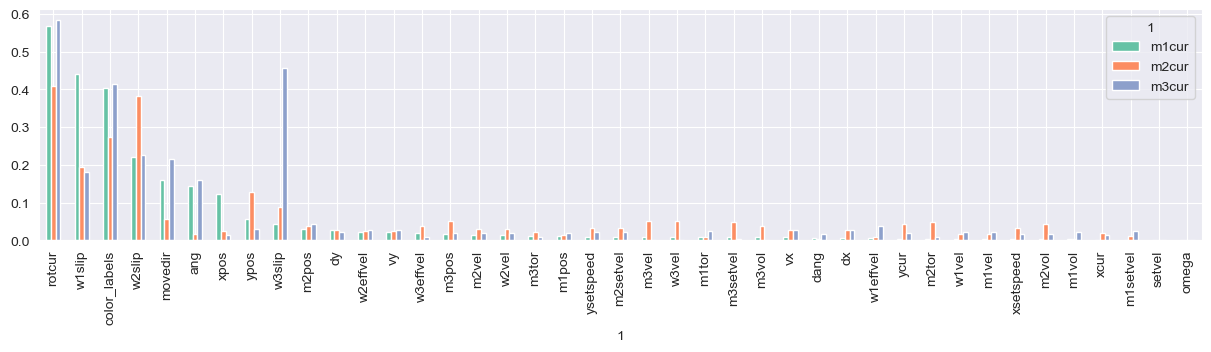

In [17]:
correlation_matrix = df.corr()
correlation_matrix[['m1cur', 'm2cur', 'm3cur']].drop(['m1cur', 'm2cur', 'm3cur']).abs().sort_values(by = "m1cur", ascending = False).plot.bar(figsize = (15, 3))
plt.show()

In [18]:
df.drop(columns = ['omega', 'setvel', 'm1setvel',
                   'xcur', 'm1vol', 'm2vel',
                   'xsetspeed', 'm1vel', 'w1vel',
                   'm2tor', 'ycur', 'w1effvel',
                   'dx', 'dang', 'vx',
                   'm3vol', 'm3setvel', 'm1tor', 
                   'w3vel', 'm3vel', 'm2setvel', 
                   'ysetspeed', 'm1pos', 'm3tor', 
                   'w2vel', 'm2vel', 'm3pos', 'w3effvel'], inplace = True)

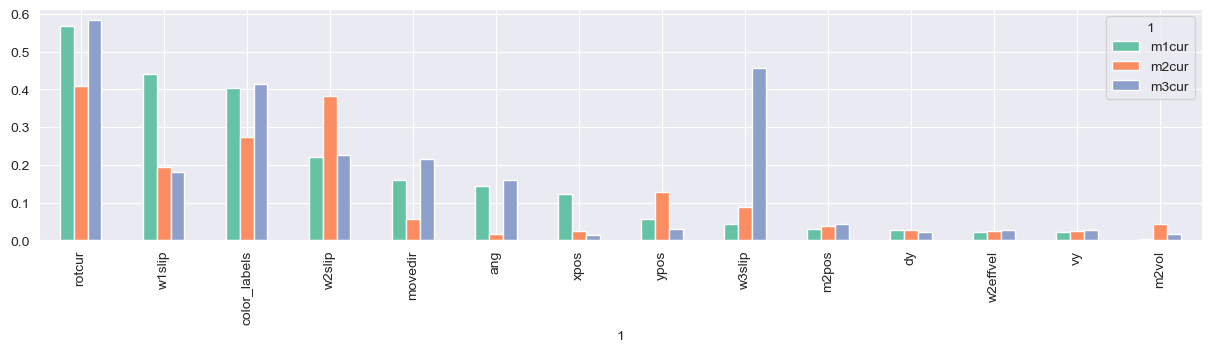

In [19]:
correlation_matrix = df.corr()
correlation_matrix[['m1cur', 'm2cur', 'm3cur']].drop(['m1cur', 'm2cur', 'm3cur']).abs().sort_values(by = "m1cur", ascending = False).plot.bar(figsize = (15, 3))
plt.show()

In [20]:
corr_matrix = df.corr().abs()

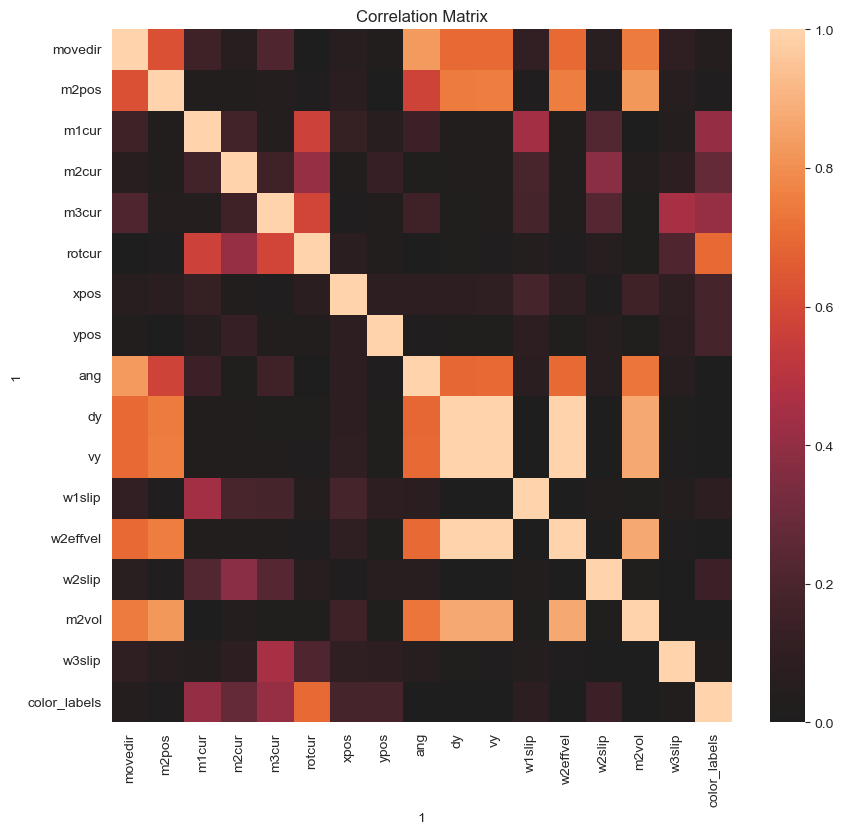

In [21]:
plt.figure(figsize=(10, 9))
sns.heatmap(corr_matrix, vmin= 0, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

## Training models

In [22]:
X = df.drop(columns = ['m1cur', 'm2cur', 'm3cur'])
y = df[['m1cur', 'm2cur', 'm3cur']]

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessing = ColumnTransformer([
    ('standard_scaler', StandardScaler(), ['movedir', 'm2pos', 'rotcur', 'xpos', 'ypos', 
                                           'ang', 'dy', 'vy', 'w1slip', 'w2effvel', 'w2slip',
                                           'm2vol', 'w3slip']),
    ('one_hot_encoder', OneHotEncoder(handle_unknown = 'ignore'), ['color_labels'])
])

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def get_metrics(model, X_real, y_real):
    yhat = model.predict(X_real)
    rmse = mean_squared_error(yhat, y_real, squared = False)
    mae = mean_absolute_error(yhat, y_real)
#     print(f'RMSE: {rmse}')
#     print(f'MAE: {mae(yhat, y_real)}')
    return rmse, mae

In [26]:
def print_error_in_sets(model, X_train = X_train, y_train = y_train,
                        X_valid = X_valid, y_valid = y_valid, X_test = X_test, y_test = y_test):
    train_rmse, train_mae = get_metrics(model, X_train, y_train)
    valid_rmse, valid_mae = get_metrics(model, X_valid, y_valid)
    test_rmse, test_mae = get_metrics(model, X_test, y_test)

    metrics = {'Training set' : [train_rmse, train_mae], 
               'Validation set' : [valid_rmse, valid_mae], 
               'Testing set': [test_rmse, test_mae]}
    
    df_metrics = pd.DataFrame(metrics, index = ['RMSE', 'MAE'])
    print (df_metrics)
#     print_metrics(model, X_train, y_train)
#     print('On validation set:')
#     print_metrics(model, X_valid, y_valid)
#     print('On testing set:')
#     print_metrics(model, X_test, y_test)

### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.pipeline import Pipeline

tree_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('decision-tree', DecisionTreeRegressor(random_state = 42))
])

tree_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['movedir', 'm2pos', 'rotcur',
                                                   'xpos', 'ypos', 'ang', 'dy',
                                                   'vy', 'w1slip', 'w2effvel',
                                                   'w2slip', 'm2vol',
                                                   'w3slip']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['color_labels'])])),
                ('decision-tree', DecisionTreeRegressor(random_state=42))])

In [34]:
print_error_in_sets(tree_reg)

      Training set  Validation set  Testing set
RMSE  2.038415e-18        0.119416     0.118715
MAE   2.905107e-20        0.089461     0.089030


In [29]:
def objective(trial):
    params = {
        'criterion': trial.suggest_categorical('criterion', ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']),
        'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', [None, 'auto', 'sqrt', 'log2'])
    }
    
    tree_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('decision-tree', DecisionTreeRegressor(**params, random_state=42))
    ])
    
    score = mean_squared_error(y_valid, tree_reg.fit(X_train, y_train).predict(X_valid))
    return score

study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=50)

# Print best parameters
# print("Best parameters: ")
# print(study.best_params)

[I 2024-11-22 14:00:26,641] A new study created in memory with name: no-name-1610dd30-b62c-48a8-ad4e-5f34f3b9fe91


In [30]:
# study.best_params

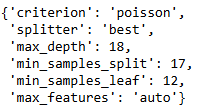

In [35]:
best_params_tree = {'criterion': 'poisson',
 'splitter': 'best',
 'max_depth': 18,
 'min_samples_split': 17,
 'min_samples_leaf': 12,
 'max_features': 'auto'}

In [36]:
best_tree_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('decision-tree', DecisionTreeRegressor(**best_params_tree, random_state=42))
    ])

best_tree_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['movedir', 'm2pos', 'rotcur',
                                                   'xpos', 'ypos', 'ang', 'dy',
                                                   'vy', 'w1slip', 'w2effvel',
                                                   'w2slip', 'm2vol',
                                                   'w3slip']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['color_labels'])])),
                ('decision-tree',
                 DecisionTreeRegressor(criterion='poisson', max_depth=18,
                                       max_features='auto', min_samples_leaf=12,
                                       min_samples_split=17,
                                       random_state=42))])

In [37]:
print_error_in_sets(best_tree_reg)

      Training set  Validation set  Testing set
RMSE      0.084096        0.099889     0.099172
MAE       0.064296        0.076389     0.075802


In [40]:
# decision_tree = tree_reg.named_steps['decision-tree']

# # Plot the tree
# plt.figure(figsize=(20, 10))
# plot_tree(decision_tree, filled=True)
# plt.show()

### Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('random-forest', RandomForestRegressor(random_state = 42))
])

forest_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['movedir', 'm2pos', 'rotcur',
                                                   'xpos', 'ypos', 'ang', 'dy',
                                                   'vy', 'w1slip', 'w2effvel',
                                                   'w2slip', 'm2vol',
                                                   'w3slip']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['color_labels'])])),
                ('random-forest', RandomForestRegressor(random_state=42))])

In [36]:
print_error_in_sets(forest_reg)

      Training set  Validation set  Testing set
RMSE      0.031509        0.083886     0.082577
MAE       0.023663        0.063784     0.062996


In [37]:
def objective(trial):
    # Suggest hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 20, 50, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }

    model = Pipeline([
    ('preprocessing', preprocessing),
    ('random-forest', RandomForestRegressor(**params, random_state = 42))
    ])
    
    model.fit(X_train, y_train)
    score = mean_squared_error(y_valid, model.predict(X_valid))
    return score

study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=10)

[I 2024-11-22 14:01:27,432] A new study created in memory with name: no-name-0a1767b4-ae82-4600-ba1d-6ebef5f94583


In [38]:
# study.best_params

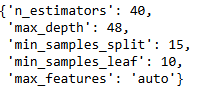

In [39]:
best_params_forest = {'n_estimators': 40,
 'max_depth': 48,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'auto'}

In [40]:
best_forest_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('decision-tree', RandomForestRegressor(**best_params_forest, random_state=42))
    ])

best_forest_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['movedir', 'm2pos', 'rotcur',
                                                   'xpos', 'ypos', 'ang', 'dy',
                                                   'vy', 'w1slip', 'w2effvel',
                                                   'w2slip', 'm2vol',
                                                   'w3slip']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['color_labels'])])),
                ('decision-tree',
                 RandomForestRegressor(max_depth=48, max_features='auto',
                                       min_samples_leaf=10,
                                       min_samples_split=15, n_estimators=40,
                                       random_state=42))])

In [41]:
print_error_in_sets(best_forest_reg)

      Training set  Validation set  Testing set
RMSE      0.074843        0.087579     0.086324
MAE       0.057062        0.066989     0.066187


### CatBoost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor

catboost_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('catboost', MultiOutputRegressor(CatBoostRegressor(random_state = 42, verbose = 0)))
])

catboost_reg.fit(X_train, y_train)

In [43]:
print_error_in_sets(catboost_reg)

      Training set  Validation set  Testing set
RMSE      0.067124        0.074289     0.073145
MAE       0.050913        0.056140     0.055561


In [44]:
def objective(trial):
    # Define hyperparameter search space
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
        'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_uniform('random_strength', 0.0, 10.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'verbose': 0
    }

    # Create CatBoost regressor
    model = Pipeline([
    ('preprocessing', preprocessing),
    ('catboost', MultiOutputRegressor(CatBoostRegressor(random_state = 42, **params)))
    ])

    # Fit model
    model.fit(X_train, y_train)
    score = mean_squared_error(y_valid, model.predict(X_valid))
    return score

# Create study and optimize
study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=20)

[I 2024-11-22 14:02:07,775] A new study created in memory with name: no-name-81f70668-97c9-4b02-a55c-cd765a0058b6


In [45]:
# study.best_params

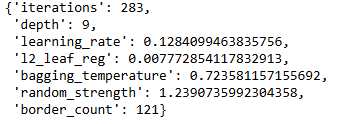

In [28]:
best_params_catboost = {'iterations': 283,
 'depth': 9,
 'learning_rate': 0.1284099463835756,
 'l2_leaf_reg': 0.007772854117832913,
 'bagging_temperature': 0.723581157155692,
 'random_strength': 1.2390735992304358,
 'border_count': 121}

In [32]:
best_catboost_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('catboost', MultiOutputRegressor(CatBoostRegressor(random_state = 42,verbose = 0, **best_params_catboost)))
    ])

best_catboost_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['movedir', 'm2pos', 'rotcur',
                                                   'xpos', 'ypos', 'ang', 'dy',
                                                   'vy', 'w1slip', 'w2effvel',
                                                   'w2slip', 'm2vol',
                                                   'w3slip']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['color_labels'])])),
                ('catboost',
                 MultiOutputRegressor(estimator=<catboost.core.CatBoostRegressor object at 0x00000247CBB24CD0>))])

In [ ]:
print_error_in_sets(best_catboost_reg)

      Training set  Validation set  Testing set
RMSE      0.067124        0.074289     0.073145
MAE       0.050913        0.056140     0.055561


### LightLBM

In [ ]:
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor

lightgbm_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('lightgbm', MultiOutputRegressor(LGBMRegressor(random_state = 42, verbose = 0)))
])

lightgbm_reg.fit(X_train, y_train)

In [ ]:
print_error_in_sets(lightgbm_reg)

      Training set  Validation set  Testing set
RMSE      0.073316        0.078197     0.076801
MAE       0.055964        0.059552     0.058726


In [31]:

def objective(trial):
    # Define hyperparameter search space
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10),
        'random_state': 42
    }

    # Create a pipeline with scaling and LightGBM for multitarget regression
    model = Pipeline([
        ('preprocessing', StandardScaler()),
        ('lightgbm', MultiOutputRegressor(
            LGBMRegressor(**params, verbose = -1)
        ))
    ])

    model.fit(X_train, y_train)
    score = mean_squared_error(y_valid, model.predict(X_valid))
    return score

# Create study and optimize
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

[I 2024-11-23 11:17:17,177] A new study created in memory with name: no-name-6772f437-b8e7-4bea-a731-5c0985c49df9
[I 2024-11-23 11:17:25,459] Trial 0 finished with value: 0.006660198397767672 and parameters: {'n_estimators': 869, 'max_depth': 10, 'learning_rate': 0.03241859757583986, 'num_leaves': 35, 'min_child_samples': 86, 'subsample': 0.9017686207751408, 'colsample_bytree': 0.837018272455267, 'reg_alpha': 0.027374973081047256, 'reg_lambda': 0.0435315310198548}. Best is trial 0 with value: 0.006660198397767672.
[I 2024-11-23 11:17:27,932] Trial 1 finished with value: 0.0070215541095609785 and parameters: {'n_estimators': 292, 'max_depth': 10, 'learning_rate': 0.09430878821417982, 'num_leaves': 27, 'min_child_samples': 25, 'subsample': 0.8794922121661299, 'colsample_bytree': 0.7648149037397768, 'reg_alpha': 3.09620991180087, 'reg_lambda': 0.007521063785756377}. Best is trial 0 with value: 0.006660198397767672.
[I 2024-11-23 11:17:32,197] Trial 2 finished with value: 0.008712661643891

In [32]:
study.best_params

{'n_estimators': 748,
 'max_depth': 12,
 'learning_rate': 0.03742726985700681,
 'num_leaves': 44,
 'min_child_samples': 14,
 'subsample': 0.5406322481316428,
 'colsample_bytree': 0.946442692209417,
 'reg_alpha': 0.011581902065603283,
 'reg_lambda': 1.8536384344051087}

In [ ]:
best_params_lightlbm = {'n_estimators': 748,
 'max_depth': 12,
 'learning_rate': 0.03742726985700681,
 'num_leaves': 44,
 'min_child_samples': 14,
 'subsample': 0.5406322481316428,
 'colsample_bytree': 0.946442692209417,
 'reg_alpha': 0.011581902065603283,
 'reg_lambda': 1.8536384344051087}

In [54]:
best_lightgbm_reg = Pipeline([
        ('preprocessing', StandardScaler()),
        ('lightgbm', MultiOutputRegressor(
            LGBMRegressor(**best_params_lightlbm, verbose = -1)
        ))
    ])

best_lightgbm_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('lightgbm',
                 MultiOutputRegressor(estimator=LGBMRegressor(bagging_temperature=0.723581157155692,
                                                              border_count=121,
                                                              depth=9,
                                                              iterations=283,
                                                              l2_leaf_reg=0.007772854117832913,
                                                              learning_rate=0.1284099463835756,
                                                              random_strength=1.2390735992304358,
                                                              verbose=-1)))])

In [55]:
print_error_in_sets(best_lightgbm_reg)

      Training set  Validation set  Testing set
RMSE      0.071264        0.077176     0.075660
MAE       0.054296        0.058638     0.057744


### Neural network

In [56]:
X_train = preprocessing.fit_transform(X_train)
X_valid = preprocessing.transform(X_valid)

In [57]:
X_train.shape

(30573, 16)

In [58]:
model = tf.keras.Sequential([
    tf.keras.Input(shape = (16, )),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(3)
])

optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
history = model.fit(X_train, y_train, epochs = 20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
956/956 [==============================] - 5s 5ms/step - loss: 0.1270 - root_mean_squared_error: 0.3564 - val_loss: 0.0500 - val_root_mean_squared_error: 0.2236
Epoch 2/20
956/956 [==============================] - 4s 4ms/step - loss: 0.0405 - root_mean_squared_error: 0.2011 - val_loss: 0.0340 - val_root_mean_squared_error: 0.1843
Epoch 3/20
956/956 [==============================] - 4s 4ms/step - loss: 0.0290 - root_mean_squared_error: 0.1704 - val_loss: 0.0258 - val_root_mean_squared_error: 0.1607
Epoch 4/20
956/956 [==============================] - 4s 4ms/step - loss: 0.0230 - root_mean_squared_error: 0.1515 - val_loss: 0.0216 - val_root_mean_squared_error: 0.1470
Epoch 5/20
956/956 [==============================] - 4s 4ms/step - loss: 0.0197 - root_mean_squared_error: 0.1404 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1380
Epoch 6/20
956/956 [==============================] - 4s 4ms/step - loss: 0.0177 - root_mean_squared_error: 0.1330 - val_loss: 0.0175 - val_

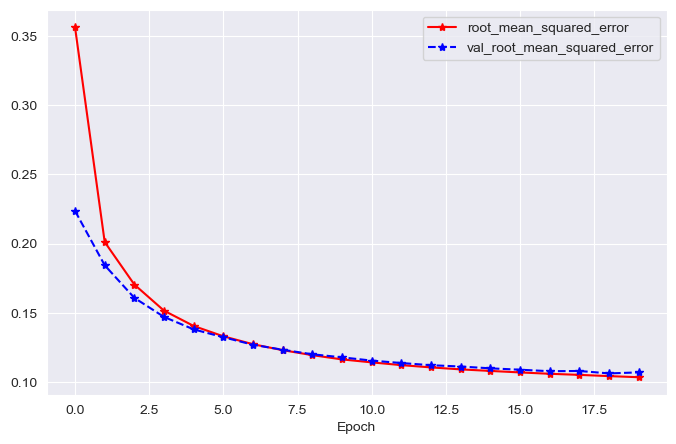

In [59]:
pd.DataFrame(history.history)[["root_mean_squared_error", "val_root_mean_squared_error"]].plot(
    figsize = (8, 5), grid = True, xlabel = 'Epoch',
    style = ['r-*', 'b--*'])

plt.show()

In [60]:
model.evaluate(X_valid, y_valid)

410/410 [==============================] - 1s 3ms/step - loss: 0.0114 - root_mean_squared_error: 0.1069


[0.011421640403568745, 0.10687205940485]

In [61]:
def objective(trial):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape = (16, )))

    n_layers = trial.suggest_int('n_layers', 2, 5)
    for i in range(n_layers):
        n_units = trial.suggest_int(f'n_units_{i}', 16, 128)
        activation = trial.suggest_categorical(f'activation_{i}', ['relu', 'sigmoid', 'relu'])
        model.add(tf.keras.layers.Dense(n_units, activation="relu"))

        dropout_rate = trial.suggest_float(f'dropout_rate_{i}', 0.0, 0.3)
        model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(3))

    lr = trial.suggest_float("lr", 1e-5, 1e-3, log=True)
    epochs = trial.suggest_int('epochs', 10, 50)
    optimizer = tf.keras.optimizers.Adam(learning_rate= lr)
    model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

    model.fit(X_train, y_train, epochs = epochs,
                    validation_data=(X_valid, y_valid), verbose = 0)

    mse, rmse = model.evaluate(X_valid, y_valid)
    return rmse

In [62]:
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials= 50)

In [63]:
# study.best_params

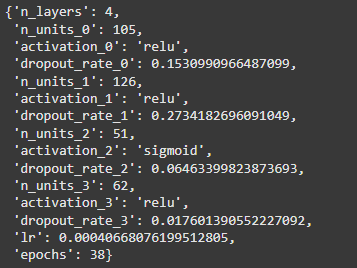

In [64]:
best_model = tf.keras.Sequential([
    tf.keras.Input(shape = (16, )),
    tf.keras.layers.Dense(105, activation="relu"),
    tf.keras.layers.Dropout(0.1530990966487099),
    tf.keras.layers.Dense(126, activation="relu"),
    tf.keras.layers.Dropout(0.2734182696091049),
    tf.keras.layers.Dense(51, activation="sigmoid"),
    tf.keras.layers.Dropout(0.06463399823873693),
    tf.keras.layers.Dense(62, activation="relu"),
    tf.keras.layers.Dropout(0.017601390552227092),
    tf.keras.layers.Dense(3)
])

optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00040668076199512805)

best_model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
history = best_model.fit(X_train, y_train, epochs = 38,
                    validation_data=(X_valid, y_valid))

Epoch 1/38


956/956 [==============================] - 7s 6ms/step - loss: 0.0675 - root_mean_squared_error: 0.2599 - val_loss: 0.0260 - val_root_mean_squared_error: 0.1613
Epoch 2/38
956/956 [==============================] - 5s 5ms/step - loss: 0.0333 - root_mean_squared_error: 0.1826 - val_loss: 0.0200 - val_root_mean_squared_error: 0.1413
Epoch 3/38
956/956 [==============================] - 5s 5ms/step - loss: 0.0268 - root_mean_squared_error: 0.1637 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1303
Epoch 4/38
956/956 [==============================] - 5s 6ms/step - loss: 0.0233 - root_mean_squared_error: 0.1526 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1269
Epoch 5/38
956/956 [==============================] - 6s 6ms/step - loss: 0.0211 - root_mean_squared_error: 0.1452 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1213
Epoch 6/38
956/956 [==============================] - 5s 6ms/step - loss: 0.0195 - root_mean_squared_error: 0.1398 - val_loss: 0.0134 - val_root_mean_s

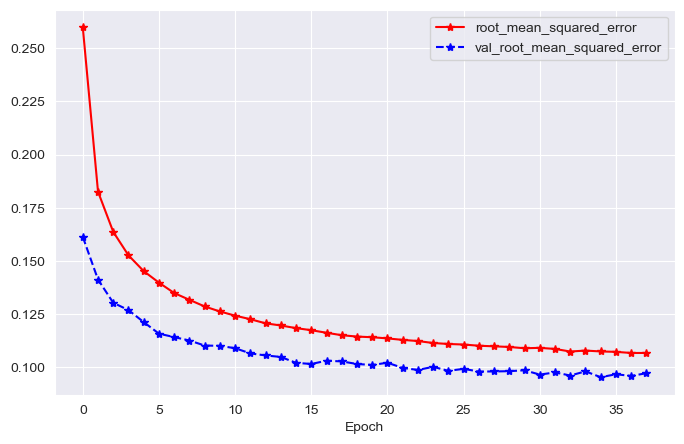

In [65]:
pd.DataFrame(history.history)[["root_mean_squared_error", "val_root_mean_squared_error"]].plot(
    figsize = (8, 5), grid = True, xlabel = 'Epoch',
    style = ['r-*', 'b--*'])

plt.show()

In [66]:
X_test = preprocessing.transform(X_test)

In [67]:
X_test.shape, X_train.shape, X_valid.shape

((10920, 16), (30573, 16), (13104, 16))

In [68]:
def print_error_in_sets(model, X_train = X_train, y_train = y_train,
                        X_valid = X_valid, y_valid = y_valid, X_test = X_test, y_test = y_test):
    train_rmse, train_mae = get_metrics(model, X_train, y_train)
    valid_rmse, valid_mae = get_metrics(model, X_valid, y_valid)
    test_rmse, test_mae = get_metrics(model, X_test, y_test)

    metrics = {'Training set' : [train_rmse, train_mae], 
               'Validation set' : [valid_rmse, valid_mae], 
               'Testing set': [test_rmse, test_mae]}
    
    df_metrics = pd.DataFrame(metrics, index = ['RMSE', 'MAE'])
    print (df_metrics)

In [69]:
print_error_in_sets(best_model, X_train = X_train, y_train = y_train,
                        X_valid = X_valid, y_valid = y_valid, X_test = X_test, y_test = y_test)

342/342 [==============================] - 1s 2ms/step
      Training set  Validation set  Testing set
RMSE      0.090836        0.092320     0.091298
MAE       0.069863        0.070893     0.070461


In [71]:
import keras_tuner as kt

def model_builder(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(16,)))

    # Tune the number of layers
    hp_layers = hp.Int('num_layers', min_value=2, max_value=5, step=1)
    for i in range(hp_layers):
        # Tune the number of units in each layer
        hp_units = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32)
        
        # Tune the activation function for each layer
        hp_activation = hp.Choice(f'activation_{i}', values=['relu', 'sigmoid', 'tanh'])
        
        model.add(tf.keras.layers.Dense(units=hp_units, activation=hp_activation))

        # Tune the dropout rate for each layer
        hp_dropout = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
        model.add(tf.keras.layers.Dropout(rate=hp_dropout))

    # Output layer
    model.add(tf.keras.layers.Dense(3))

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Tune the number of epochs
    hp_epochs = hp.Int('epochs', min_value=10, max_value=50, step=10)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mse',
                  metrics=['RootMeanSquaredError'])

    return model

tuner = kt.RandomSearch(
    model_builder,
    objective='val_loss',  # or 'val_RootMeanSquaredError'
    max_trials=10, 
    executions_per_trial=3,
    directory='my_dir',  
    project_name='surface_classification'
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) 

Reloading Tuner from my_dir\surface_classification\tuner0.json


In [74]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

loss, rmse = best_model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test RMSE: {rmse}")

342/342 [==============================] - 1s 3ms/step - loss: 0.0092 - root_mean_squared_error: 0.0962
Test loss: 0.009245584718883038
Test RMSE: 0.09615395218133926


In [79]:
best_hyperparameters.values

{'num_layers': 3,
 'units_0': 512,
 'activation_0': 'tanh',
 'dropout_0': 0.2,
 'units_1': 160,
 'activation_1': 'tanh',
 'dropout_1': 0.2,
 'learning_rate': 0.001,
 'epochs': 50,
 'units_2': 64,
 'activation_2': 'sigmoid',
 'dropout_2': 0.0}

In [75]:
best_model = tuner.hypermodel.build(best_hyperparameters)

In [78]:
history = best_model.fit(X_train, y_train,  epochs = 20, validation_data=(X_valid, y_valid))

Epoch 1/20
956/956 [==============================] - 6s 5ms/step - loss: 0.0462 - root_mean_squared_error: 0.2149 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1234
Epoch 2/20
956/956 [==============================] - 5s 5ms/step - loss: 0.0174 - root_mean_squared_error: 0.1319 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1115
Epoch 3/20
956/956 [==============================] - 5s 5ms/step - loss: 0.0153 - root_mean_squared_error: 0.1239 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106
Epoch 4/20
956/956 [==============================] - 6s 7ms/step - loss: 0.0144 - root_mean_squared_error: 0.1198 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1082
Epoch 5/20
956/956 [==============================] - 6s 6ms/step - loss: 0.0134 - root_mean_squared_error: 0.1158 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1040
Epoch 6/20
956/956 [==============================] - 5s 6ms/step - loss: 0.0130 - root_mean_squared_error: 0.1138 - val_loss: 0.0107 - val_

In [80]:
print_error_in_sets(best_model, X_train = X_train, y_train = y_train,
                        X_valid = X_valid, y_valid = y_valid, X_test = X_test, y_test = y_test)

342/342 [==============================] - 1s 2ms/step
      Training set  Validation set  Testing set
RMSE      0.086798        0.088901     0.087352
MAE       0.066709        0.068008     0.067329
